In [1]:
using Pkg, Revise
Pkg.activate("..")
using Clapeyron, PyCall
import PyPlot; const plt = PyPlot
import DataFrames

  Activating new project at `C:\Users\sutha\OneDrive\Documents\Kuliah\Skripsi\ClapeyronThermo Clapeyron.jl master examples`


In [4]:
using Clapeyron

glycine_data = """Clapeyron Database File
My SolidHfus Parameters
species,Mw,Tm,Hfus
glycine,75.0666,565,24100
"""
#------------------------------------------------------------------------
#data ambil dari fuchs (2006)
#------------------------------------------------------------------------
like_parameter = """Clapeyron Database File
PCSAFT Like Parameters [csvtype = like,grouptype = PCSAFT]
species,Mw,segment,sigma,epsilon
glycine,75.07,3.79,2.61,320
water,18,1.2047,2.811,353.95
"""
#segment = jumlah segmen
#sigma = diameter segmen
#epsilon = parameter energi
#------------------------------------------------------------------------
unlike_parameter = """Clapeyron Database File
PCSAFT Unlike Parameters [csvtype = unlike,grouptype = PCSAFT]
species1,species2,k
glycine,water,-0.0665
"""
#k = interaksi biner
#------------------------------------------------------------------------
assoc_parameter = """Clapeyron Database File
PCSAFT Assoc Parameters [csvtype = assoc,grouptype = PCSAFT]
species1,site1,species2,site2,epsilon_assoc,bondvol
glycine,H,glycine,e,1539.53,0.025
glycine,e,glycine,H,1539.53,0.025
water,H,water,e,2425.67,0.045
water,e,water,H,2425.67,0.045
"""
#epsilon_assoc = parameter energi asosiasi
#bondvol = volume asosiasi
#------------------------------------------------------------------------

components = [("water"), ("glycine")]

model = CompositeModel(components;
                       fluid = PCSAFT,
                       solid = SolidHfus,
                       solid_userlocations = [glycine_data],
                       fluid_userlocations = [like_parameter,unlike_parameter,assoc_parameter])

Composite Model with 2 components:
 "water"
 "glycine"
Solid Model: SolidHfus("water", "glycine")
Fluid Model: PCSAFT{BasicIdeal, Float64}("water", "glycine")

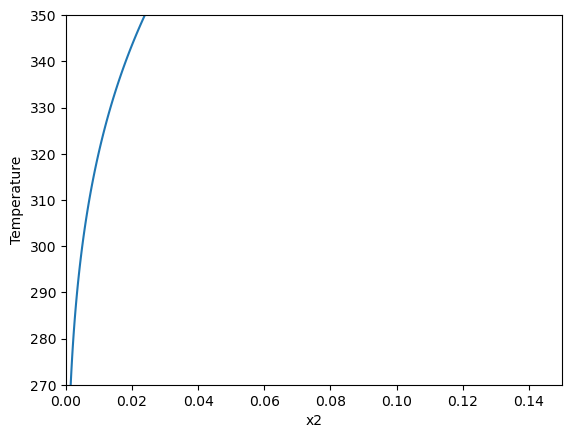

--- Tabel Rekapitulasi (10 Data Pertama) ---


Row,Temperatur_K,Fraksi_Mol_Glycine
,Float64,Float64
1,270.0,0.00145022
2,271.0,0.00151741
3,272.0,0.0015872
4,273.0,0.00165964
5,274.0,0.00173482
6,275.0,0.00181282
7,276.0,0.00189373
8,277.0,0.00197761
9,278.0,0.00206457


Data berhasil disimpan ke 'hasil_kelarutan_glycine.csv'


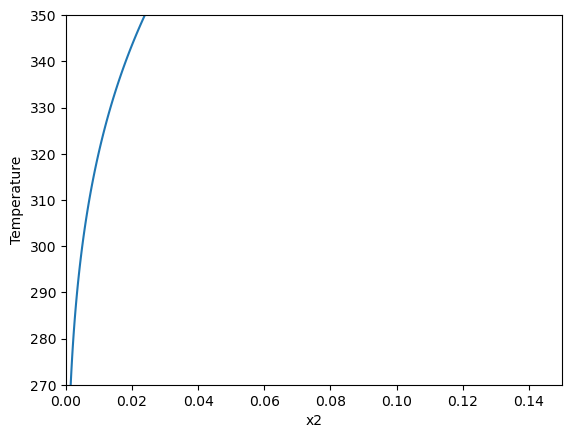

In [5]:
using Clapeyron

T = LinRange(270.,350.,81)
p = 100000 

s = zeros(length(T))

for i in 1:length(T)
    s[i] = sle_solubility(model,p,T[i],[1.,1.];solute=["glycine"])[2]
end

plt.clf()
plt.plot(s,T)
plt.xlabel("x2")
plt.ylabel("Temperature")
plt.xlim(0,0.15)
plt.ylim(270,350)
display(plt.gcf())

using DataFrames, CSV

# 1. Pastikan loop perhitungan sudah dijalankan dan variabel 'T' serta 's' sudah terisi
# (Kode loop dari jawaban sebelumnya)

# 2. Buat DataFrame (Tabel)
# Kita gabungkan data Temperatur (T) dan Kelarutan (s) menjadi satu tabel
tabel_hasil = DataFrame(
    Temperatur_K = T, 
    Fraksi_Mol_Glycine = s
)

# 3. Tampilkan 10 baris pertama untuk pengecekan
println("--- Tabel Rekapitulasi (10 Data Pertama) ---")
display(first(tabel_hasil, 10))

# 4. Simpan ke file CSV (Excel readable)
# File akan tersimpan di folder kerja Anda dengan nama "hasil_kelarutan_glycine.csv"
CSV.write("glycine_PCSAFT.csv", tabel_hasil)

println("Data berhasil disimpan ke 'hasil_kelarutan_glycine.csv'")